In [1]:
import pandas as pd
import netCDF4
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
wind4 = xr.open_dataset('ERA5-Algeria_wind-4.nc') #2011-01-01T00:00 to 2018-12-31T21:00

In [3]:
w = np.sqrt(np.square(wind4.u100)+np.square(wind4.v100))

In [4]:
t_season = w.groupby('time.season').mean()

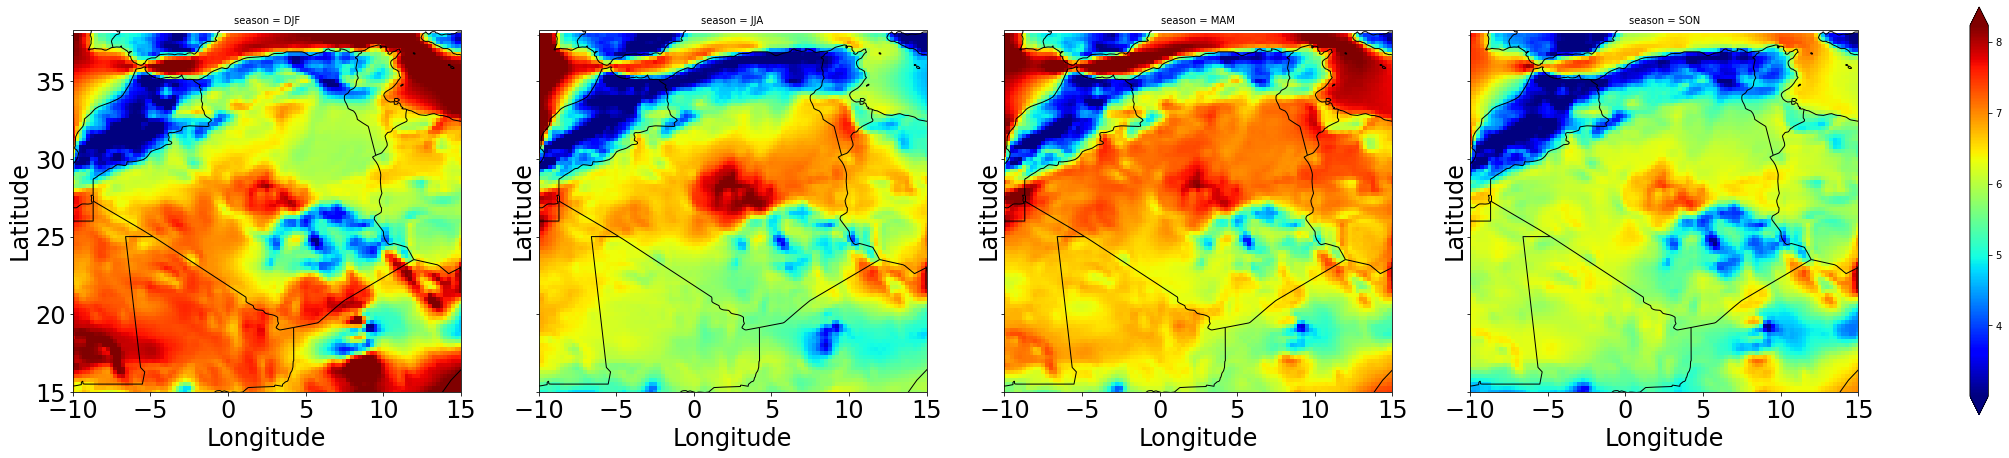

In [6]:
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

fg = t_season.plot(figsize=(40,7.5),
    col="season",
      # remember to provide this!
    subplot_kws={
        "projection": ccrs.PlateCarree(
            central_longitude=0,  globe=None
        )
    },
    cmap=plt.cm.jet,
    add_colorbar=True,
    add_labels=True,
    robust=True,
)
  

for ax in fg.axes.flat:
    
    ax.coastlines()
    #ax.gridlines()
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent((-10.0, 15, 15, 38))
    #ax.set_xlim(-2, 6)
    
        
    #ax.set_title('test title')
    ax.set_xlabel('Longitude',fontsize=24, color='black')
    ax.set_ylabel('Latitude',fontsize=24, color='black')
    ax.set_xticks([-10, 15],4)
    ax.set_yticks([25, 38],2)
    ax.tick_params(axis='both', which='major', labelsize=24)
    #cb = plt.scatter(levels, levels, c=klist, cmap=coolwarm)
    